### Number Partitioning Problem

As shown in DeRaedt2001Number [arXiv:quant-ph/0010018](http://arxiv.org/abs/quant-ph/0010018), the problem of solving the so-called "m"-degeneracy in the Black Hole Entropy calculation in LQG, can be mapped to the problem of finding the ground states of the following Hamiltonian for a 1D spin-chain:
$$ H = \Delta - \sum_{j=1}^n a_j \sigma_j^z $$
where $ \{a_j\} $ are a set of $n$ positive integers, which we wish to partition into two disjoint sets $A_1$ and $A_2$, such that:
$$ \vert \sum_{a_j \in A_1} a_j - \sum_{a_j \in A_2} a_j \vert \le \Delta $$

In order to find the ground states of $H$, we will use the Python based library [QuTip](http://qutip.org)

In [2]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

In [3]:
def setupHamiltonian(N, a_list, delta=0):
    '''Function takes three arguments, N the number of spins, a_list a list of N non-negative
    integers, and the parameter delta (which defaults to 0) and returns a 2**N dimensional
    matrix object representing the Hamiltonian of the system.'''
    if (not isinstance(N, (int, np.integer))) or N < 1:
        raise ValueError("N must be positive integer N >= 1")
    
    if (not isinstance(a_list, (list,np.ndarray))):
        raise ValueError("a_list must be a list")
        
    if (not len(a_list)==N):
        raise ValueError("a_list must be list of length N")
        
    for n in range(N):
        if (not isinstance(a_list[n], (int, np.integer))) or a_list[n] <= 0:
            raise ValueError("All elements of a_list must be positive, non-zero integers")
    
    si = qeye(2)
    sz = sigmaz()
    
    # setup identity operator
    id_op = tensor([si for n in range(N)])
    sz_list = []
    
    for n in range(N):
        op_list = []
        
        # Create list of identity operators for all N sites
        for m in range(N):
            op_list.append(si)

        # Set the n^th item of the operator list to sigmaz  
        op_list[n] = a_list[n]*sz
        
        # take the tensor product of all the operators in the operator list and append
        # to the sigmax operator list
        sz_list.append(tensor(op_list))
    
    H = 0
        
    H += delta * id_op
    
    H += tensor(op_list)
    
#    print H
    
    return H

In [89]:
np.ones(10)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [90]:
np.ndarray?

In [4]:
H = setupHamiltonian(10,np.ones(10,dtype=np.integer),delta=2)

In [7]:
H.eigenenergies()

array([ 1.,  1.,  1., ...,  3.,  3.,  3.])

In [8]:
evect1 = H.eigenstates(eigvals=1)

In [9]:
evectarr = evect1[1][0].full()

In [10]:
evectarr

array([[ 0.+0.j],
       [ 0.+0.j],
       [ 0.+0.j],
       ..., 
       [ 0.+0.j],
       [ 0.+0.j],
       [ 1.+0.j]])

In [126]:
H.eigenstates?

In [99]:
from IPython.display import Latex

In [103]:
Latex(r'$\uparrow$')

<IPython.core.display.Latex object>

In [139]:
vals = np.zeros(10)
for n in range(10):
    if np.random.random() > 0.5:
        vals[n] = 1
    else:
        vals[n] = 0
vals

array([ 0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.])

In [167]:
latex_vals = r'$'
for n in range(10):
    if vals[n] == 0:
        latex_vals += r'\uparrow'
    else:
        latex_vals += r'\downarrow'
latex_vals += r'$'

print latex_vals

$\uparrow\downarrow\downarrow\uparrow\downarrow\uparrow\uparrow\downarrow\uparrow\downarrow$


In [168]:
Latex(latex_vals)

<IPython.core.display.Latex object>

(<matplotlib.figure.Figure at 0x107f4cac8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x107f68eb8>)

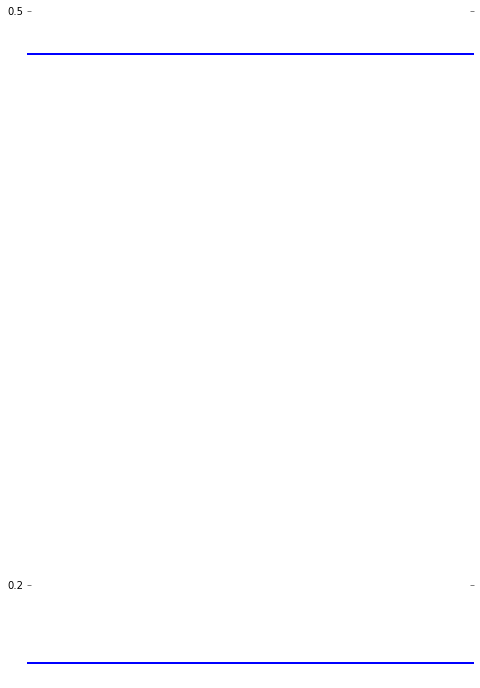

In [6]:
plot_energy_levels([H], show_ylabels=True)

In [44]:
# testing area

N = 3
si = qeye(2)
sz = sigmaz()

sz_list = []

# Create list of identity operators for all N sites
for n in range(N):
    op_list = []
    for m in range(N):
        op_list.append(si)

    # Set the n^th item of the operator list to sigmaz  
    op_list[n] = sz
    
    sz_list.append(tensor(op_list))

print sz_list

[Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = [8, 8], type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.]], Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = [8, 8], type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.]], Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = [8, 8], type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0